In [1]:
################################ MUSIC RECOMMENDATION SYSTEM BASED ON EMOTION DETECTION ################################

In [2]:
from zipfile import ZipFile
file_name = "archive.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import cv2

In [4]:
train_img_datagen = ImageDataGenerator(rescale=1./255)
val_img_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_ds  = train_img_datagen.flow_from_directory(
    'train',
    target_size = (48, 48),
    batch_size = 64,
    color_mode = 'rgb',
    class_mode='categorical')
val_ds  = val_img_datagen.flow_from_directory(
    'test',
    target_size = (48, 48),
    batch_size = 64,
    color_mode = 'rgb',
    class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
print(val_ds.class_indices)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [7]:
base_model = tf.keras.applications.ResNet50(input_shape=(48,48,3),include_top=False, weights='imagenet')

94781440/94765736 [==============================] - 1s 0us/step


In [8]:
model = Sequential()
model.add(base_model)
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(48,48,3), data_format='channels_last'))
model.add(Conv2D(64, kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Conv2D(128, kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(7, activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6, amsgrad='True'), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
epochs = 12
model_info=model.fit_generator(train_ds, steps_per_epoch=449, epochs=epochs, validation_data=val_ds, validation_steps=112)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/12
449/449 [==============================] - 2954s 7s/step - loss: 1.6014 - accuracy: 0.3514 - val_loss: 1.8935 - val_accuracy: 0.2458
Epoch 2/12
449/449 [==============================] - 2979s 7s/step - loss: 1.2300 - accuracy: 0.5365 - val_loss: 1.3218 - val_accuracy: 0.5060
Epoch 3/12
449/449 [==============================] - 2986s 7s/step - loss: 0.9994 - accuracy: 0.6335 - val_loss: 1.2861 - val_accuracy: 0.5568
Epoch 4/12
449/449 [==============================] - 2983s 7s/step - loss: 0.7797 - accuracy: 0.7197 - val_loss: 1.2157 - val_accuracy: 0.5808
Epoch 5/12
449/449 [==============================] - 3026s 7s/step - loss: 0.5879 - accuracy: 0.7946 - val_loss: 1.3761 - val_accuracy: 0.5989
Epoch 6/12
449/449 [==============================] - 3203s 7s/step - loss: 0.4491 - accuracy: 0.8437 - val_loss: 1.5881 - val_accuracy: 0.5776
Epoch 7/12
449/449 [==============================] - 3199s 7s/step - loss: 0.3434 - accuracy: 0.8849 - val_loss: 1.5200 - val_accuracy:

In [11]:
model.save('model.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


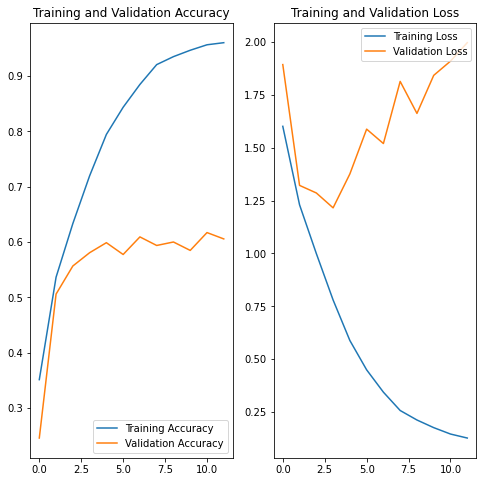

In [12]:
acc = model_info.history['accuracy']
val_acc = model_info.history['val_accuracy']
loss = model_info.history['loss']
val_loss = model_info.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()